Размер датасета: (500, 9)

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB
None

Первые 5 строк:
   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3   

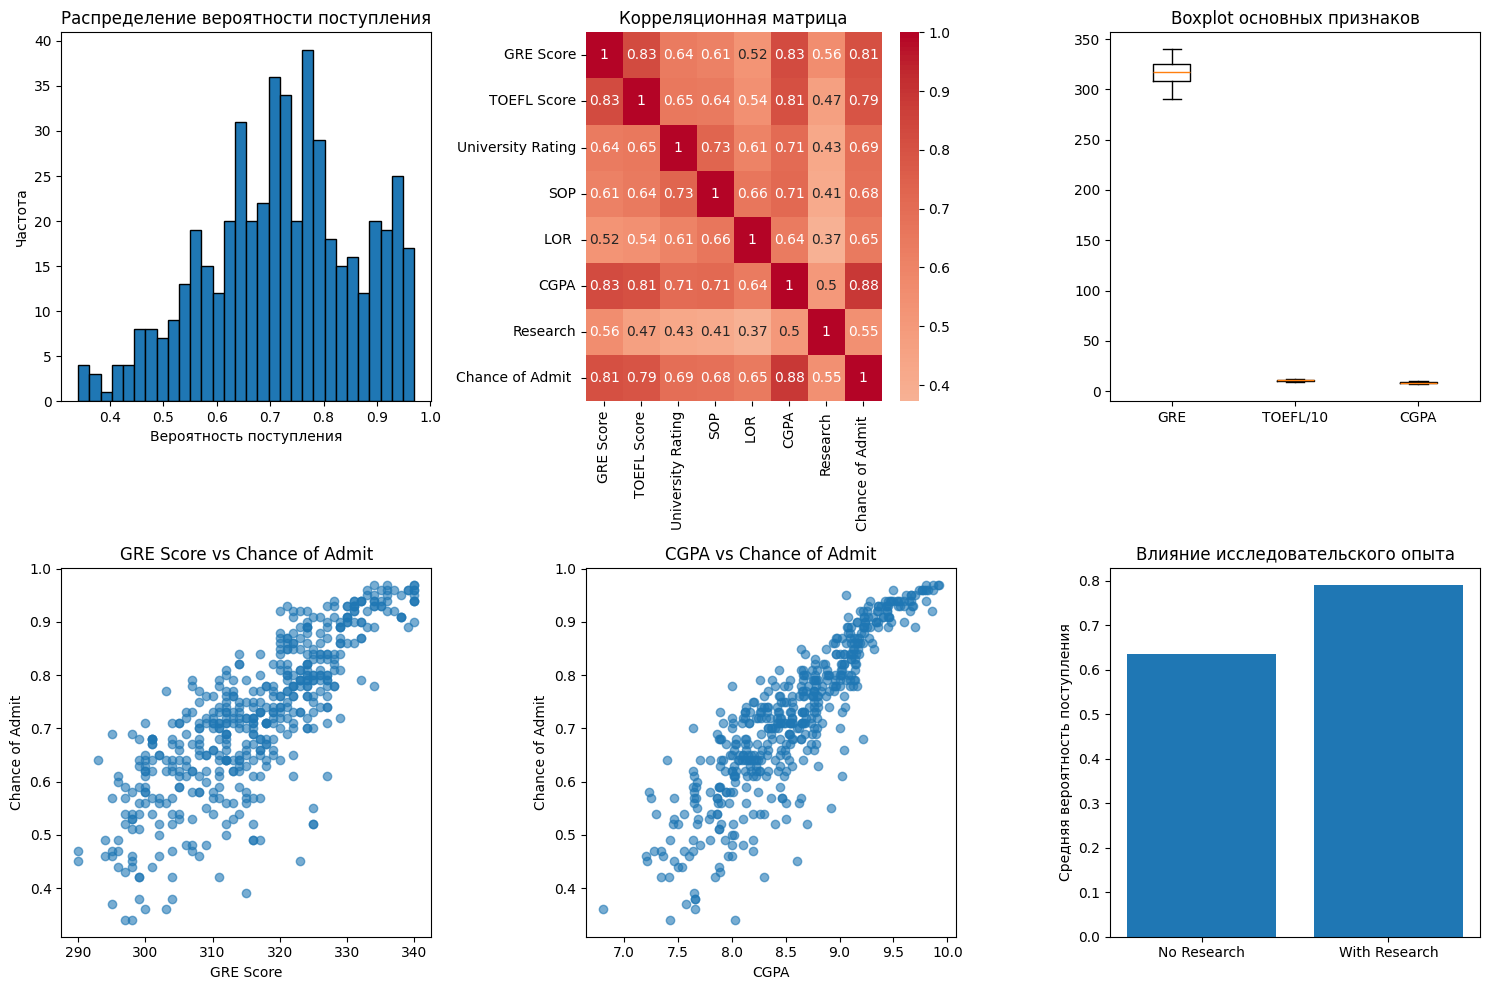


Признаки для модели:
['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']

Размер признаков: (500, 7)
Размер целевой переменной: (500,)

Статистика признаков:
        GRE Score  TOEFL Score  University Rating         SOP       LOR   \
count  500.000000   500.000000         500.000000  500.000000  500.00000   
mean   316.472000   107.192000           3.114000    3.374000    3.48400   
std     11.295148     6.081868           1.143512    0.991004    0.92545   
min    290.000000    92.000000           1.000000    1.000000    1.00000   
25%    308.000000   103.000000           2.000000    2.500000    3.00000   
50%    317.000000   107.000000           3.000000    3.500000    3.50000   
75%    325.000000   112.000000           4.000000    4.000000    4.00000   
max    340.000000   120.000000           5.000000    5.000000    5.00000   

             CGPA    Research  
count  500.000000  500.000000  
mean     8.576440    0.560000  
std      0.604813    0.4968

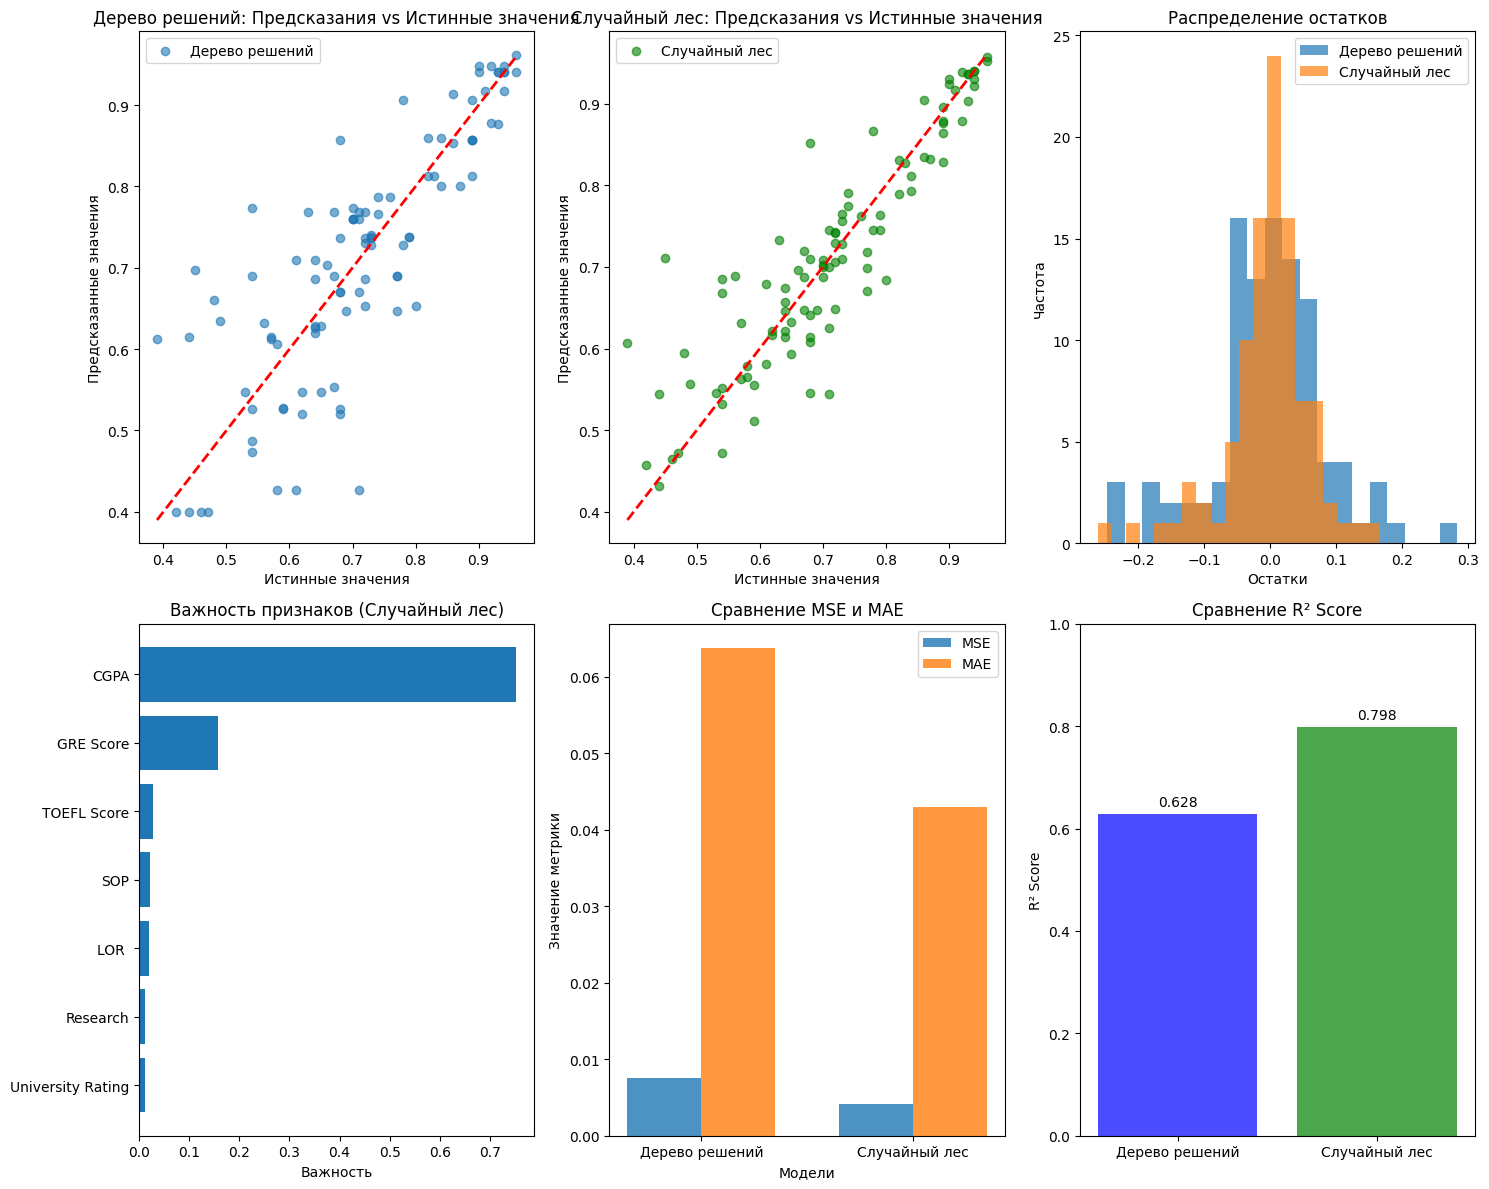


ВЫВОДЫ И АНАЛИЗ РЕЗУЛЬТАТОВ

1. ВЫБОР МЕТРИК КАЧЕСТВА:
   • MSE (Mean Squared Error) - штрафует большие ошибки сильнее
   • MAE (Mean Absolute Error) - более устойчива к выбросам
   • R² (коэффициент детерминации) - показывает долю объясненной дисперсии

2. КАЧЕСТВО МОДЕЛЕЙ:
   Дерево решений:
   • MSE: 0.007606
   • MAE: 0.063702
   • R²: 0.628090
   • Переобучение: 0.304695

   Случайный лес:
   • MSE: 0.004130
   • MAE: 0.042913
   • R²: 0.798032
   • Переобучение: 0.138674

3. СРАВНЕНИЕ И ВЫВОДЫ:
   • Случайный лес показывает лучше качество на тестовых данных
   • Случайный лес менее склонен к переобучению

4. ВАЖНОСТЬ ПРИЗНАКОВ:
   Наиболее важные признаки согласно случайному лесу:
   • CGPA: 0.7513
   • GRE Score: 0.1572
   • TOEFL Score: 0.0279

5. РЕКОМЕНДАЦИИ:
   • Для данной задачи рекомендуется использовать случайный лес
   • Случайный лес обеспечивает лучшую обобщающую способность
   • Средняя абсолютная ошибка составляет ~0.043
   • Модель объясняет ~79.8% дисперсии целев

In [3]:
# Анализ данных о поступлении в магистратуру
# Построение моделей: Дерево решений и Случайный лес

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
# Предполагается, что файл CSV уже доступен
df = pd.read_csv('Admission_Predict_Ver1.1.csv')

# Первичный анализ данных
print("Размер датасета:", df.shape)
print("\nИнформация о данных:")
print(df.info())
print("\nПервые 5 строк:")
print(df.head())
print("\nСтатистическое описание:")
print(df.describe())

# Проверка на пропущенные значения
print("\nПропущенные значения:")
print(df.isnull().sum())

# Анализ целевой переменной
print("\nРаспределение целевой переменной 'Chance of Admit':")
print(df['Chance of Admit '].describe())

# Визуализация данных
plt.figure(figsize=(15, 10))

# Распределение целевой переменной
plt.subplot(2, 3, 1)
plt.hist(df['Chance of Admit '], bins=30, edgecolor='black')
plt.title('Распределение вероятности поступления')
plt.xlabel('Вероятность поступления')
plt.ylabel('Частота')

# Корреляционная матрица
plt.subplot(2, 3, 2)
# Удаляем столбец Serial No. для корреляции
corr_data = df.drop('Serial No.', axis=1)
corr_matrix = corr_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Корреляционная матрица')

# Boxplot для некоторых признаков
plt.subplot(2, 3, 3)
plt.boxplot([df['GRE Score'], df['TOEFL Score']/10, df['CGPA']], 
           labels=['GRE', 'TOEFL/10', 'CGPA'])
plt.title('Boxplot основных признаков')

# Scatter plot: GRE vs Chance of Admit
plt.subplot(2, 3, 4)
plt.scatter(df['GRE Score'], df['Chance of Admit '], alpha=0.6)
plt.xlabel('GRE Score')
plt.ylabel('Chance of Admit')
plt.title('GRE Score vs Chance of Admit')

# Scatter plot: CGPA vs Chance of Admit
plt.subplot(2, 3, 5)
plt.scatter(df['CGPA'], df['Chance of Admit '], alpha=0.6)
plt.xlabel('CGPA')
plt.ylabel('Chance of Admit')
plt.title('CGPA vs Chance of Admit')

# Research влияние
plt.subplot(2, 3, 6)
research_groups = df.groupby('Research')['Chance of Admit '].mean()
plt.bar(['No Research', 'With Research'], research_groups.values)
plt.title('Влияние исследовательского опыта')
plt.ylabel('Средняя вероятность поступления')

plt.tight_layout()
plt.show()

# Подготовка данных для моделирования
# Удаляем Serial No. как он не несет информационной нагрузки
X = df.drop(['Serial No.', 'Chance of Admit '], axis=1)
y = df['Chance of Admit ']

print("\nПризнаки для модели:")
print(X.columns.tolist())
print("\nРазмер признаков:", X.shape)
print("Размер целевой переменной:", y.shape)

# Проверим, нужна ли стандартизация
print("\nСтатистика признаков:")
print(X.describe())

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nРазмер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

# МОДЕЛЬ 1: ДЕРЕВО РЕШЕНИЙ
print("\n" + "="*50)
print("МОДЕЛЬ 1: ДЕРЕВО РЕШЕНИЙ")
print("="*50)

# Создание и обучение модели дерева решений
dt_model = DecisionTreeRegressor(
    max_depth=10,           # Ограничиваем глубину для избежания переобучения
    min_samples_split=5,    # Минимальное количество образцов для разделения
    min_samples_leaf=3,     # Минимальное количество образцов в листе
    random_state=42
)

dt_model.fit(X_train, y_train)

# Предсказания
y_train_pred_dt = dt_model.predict(X_train)
y_test_pred_dt = dt_model.predict(X_test)

# Метрики качества для дерева решений
dt_train_mse = mean_squared_error(y_train, y_train_pred_dt)
dt_test_mse = mean_squared_error(y_test, y_test_pred_dt)
dt_train_mae = mean_absolute_error(y_train, y_train_pred_dt)
dt_test_mae = mean_absolute_error(y_test, y_test_pred_dt)
dt_train_r2 = r2_score(y_train, y_train_pred_dt)
dt_test_r2 = r2_score(y_test, y_test_pred_dt)

print("Метрики качества дерева решений:")
print(f"Обучающая выборка - MSE: {dt_train_mse:.6f}, MAE: {dt_train_mae:.6f}, R²: {dt_train_r2:.6f}")
print(f"Тестовая выборка - MSE: {dt_test_mse:.6f}, MAE: {dt_test_mae:.6f}, R²: {dt_test_r2:.6f}")

# МОДЕЛЬ 2: СЛУЧАЙНЫЙ ЛЕС
print("\n" + "="*50)
print("МОДЕЛЬ 2: СЛУЧАЙНЫЙ ЛЕС")
print("="*50)

# Создание и обучение модели случайного леса
rf_model = RandomForestRegressor(
    n_estimators=100,       # Количество деревьев
    max_depth=15,           # Максимальная глубина деревьев
    min_samples_split=5,    # Минимальное количество образцов для разделения
    min_samples_leaf=2,     # Минимальное количество образцов в листе
    random_state=42,
    n_jobs=-1              # Использовать все доступные процессоры
)

rf_model.fit(X_train, y_train)

# Предсказания
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Метрики качества для случайного леса
rf_train_mse = mean_squared_error(y_train, y_train_pred_rf)
rf_test_mse = mean_squared_error(y_test, y_test_pred_rf)
rf_train_mae = mean_absolute_error(y_train, y_train_pred_rf)
rf_test_mae = mean_absolute_error(y_test, y_test_pred_rf)
rf_train_r2 = r2_score(y_train, y_train_pred_rf)
rf_test_r2 = r2_score(y_test, y_test_pred_rf)

print("Метрики качества случайного леса:")
print(f"Обучающая выборка - MSE: {rf_train_mse:.6f}, MAE: {rf_train_mae:.6f}, R²: {rf_train_r2:.6f}")
print(f"Тестовая выборка - MSE: {rf_test_mse:.6f}, MAE: {rf_test_mae:.6f}, R²: {rf_test_r2:.6f}")

# СРАВНЕНИЕ МОДЕЛЕЙ
print("\n" + "="*50)
print("СРАВНЕНИЕ МОДЕЛЕЙ")
print("="*50)

# Создание таблицы сравнения
comparison_data = {
    'Модель': ['Дерево решений', 'Случайный лес'],
    'MSE (тест)': [dt_test_mse, rf_test_mse],
    'MAE (тест)': [dt_test_mae, rf_test_mae],
    'R² (тест)': [dt_test_r2, rf_test_r2],
    'Переобучение (R²)': [dt_train_r2 - dt_test_r2, rf_train_r2 - rf_test_r2]
}

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False, float_format='%.6f'))

# Важность признаков
print("\n" + "="*30)
print("ВАЖНОСТЬ ПРИЗНАКОВ")
print("="*30)

# Для дерева решений
dt_feature_importance = pd.DataFrame({
    'Признак': X.columns,
    'Важность': dt_model.feature_importances_
}).sort_values('Важность', ascending=False)

print("\nВажность признаков (Дерево решений):")
print(dt_feature_importance.to_string(index=False, float_format='%.4f'))

# Для случайного леса
rf_feature_importance = pd.DataFrame({
    'Признак': X.columns,
    'Важность': rf_model.feature_importances_
}).sort_values('Важность', ascending=False)

print("\nВажность признаков (Случайный лес):")
print(rf_feature_importance.to_string(index=False, float_format='%.4f'))

# ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ
plt.figure(figsize=(15, 12))

# График 1: Сравнение предсказаний с истинными значениями
plt.subplot(2, 3, 1)
plt.scatter(y_test, y_test_pred_dt, alpha=0.6, label='Дерево решений')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('Дерево решений: Предсказания vs Истинные значения')
plt.legend()

plt.subplot(2, 3, 2)
plt.scatter(y_test, y_test_pred_rf, alpha=0.6, label='Случайный лес', color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('Случайный лес: Предсказания vs Истинные значения')
plt.legend()

# График 2: Распределение остатков
plt.subplot(2, 3, 3)
residuals_dt = y_test - y_test_pred_dt
residuals_rf = y_test - y_test_pred_rf
plt.hist(residuals_dt, alpha=0.7, label='Дерево решений', bins=20)
plt.hist(residuals_rf, alpha=0.7, label='Случайный лес', bins=20)
plt.xlabel('Остатки')
plt.ylabel('Частота')
plt.title('Распределение остатков')
plt.legend()

# График 3: Важность признаков для случайного леса
plt.subplot(2, 3, 4)
plt.barh(rf_feature_importance['Признак'], rf_feature_importance['Важность'])
plt.xlabel('Важность')
plt.title('Важность признаков (Случайный лес)')
plt.gca().invert_yaxis()

# График 4: Сравнение метрик
plt.subplot(2, 3, 5)
models = ['Дерево решений', 'Случайный лес']
mse_values = [dt_test_mse, rf_test_mse]
mae_values = [dt_test_mae, rf_test_mae]

x = np.arange(len(models))
width = 0.35

plt.bar(x - width/2, mse_values, width, label='MSE', alpha=0.8)
plt.bar(x + width/2, mae_values, width, label='MAE', alpha=0.8)
plt.xlabel('Модели')
plt.ylabel('Значение метрики')
plt.title('Сравнение MSE и MAE')
plt.xticks(x, models)
plt.legend()

# График 5: R² score
plt.subplot(2, 3, 6)
r2_values = [dt_test_r2, rf_test_r2]
plt.bar(models, r2_values, color=['blue', 'green'], alpha=0.7)
plt.ylabel('R² Score')
plt.title('Сравнение R² Score')
plt.ylim(0, 1)

# Добавляем значения на столбцы
for i, v in enumerate(r2_values):
    plt.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# ВЫВОДЫ И АНАЛИЗ
print("\n" + "="*60)
print("ВЫВОДЫ И АНАЛИЗ РЕЗУЛЬТАТОВ")
print("="*60)

print("\n1. ВЫБОР МЕТРИК КАЧЕСТВА:")
print("   • MSE (Mean Squared Error) - штрафует большие ошибки сильнее")
print("   • MAE (Mean Absolute Error) - более устойчива к выбросам")
print("   • R² (коэффициент детерминации) - показывает долю объясненной дисперсии")

print(f"\n2. КАЧЕСТВО МОДЕЛЕЙ:")
print(f"   Дерево решений:")
print(f"   • MSE: {dt_test_mse:.6f}")
print(f"   • MAE: {dt_test_mae:.6f}")
print(f"   • R²: {dt_test_r2:.6f}")
print(f"   • Переобучение: {dt_train_r2 - dt_test_r2:.6f}")

print(f"\n   Случайный лес:")
print(f"   • MSE: {rf_test_mse:.6f}")
print(f"   • MAE: {rf_test_mae:.6f}")
print(f"   • R²: {rf_test_r2:.6f}")
print(f"   • Переобучение: {rf_train_r2 - rf_test_r2:.6f}")

print(f"\n3. СРАВНЕНИЕ И ВЫВОДЫ:")
if rf_test_r2 > dt_test_r2:
    print("   • Случайный лес показывает лучше качество на тестовых данных")
else:
    print("   • Дерево решений показывает лучше качество на тестовых данных")

if abs(rf_train_r2 - rf_test_r2) < abs(dt_train_r2 - dt_test_r2):
    print("   • Случайный лес менее склонен к переобучению")
else:
    print("   • Дерево решений менее склонно к переобучению")

print(f"\n4. ВАЖНОСТЬ ПРИЗНАКОВ:")
print("   Наиболее важные признаки согласно случайному лесу:")
for i, row in rf_feature_importance.head(3).iterrows():
    print(f"   • {row['Признак']}: {row['Важность']:.4f}")

print(f"\n5. РЕКОМЕНДАЦИИ:")
if rf_test_r2 > dt_test_r2:
    print("   • Для данной задачи рекомендуется использовать случайный лес")
    print("   • Случайный лес обеспечивает лучшую обобщающую способность")
else:
    print("   • Для данной задачи можно использовать дерево решений")
    print("   • Дерево решений более интерпретируемо")

print(f"   • Средняя абсолютная ошибка составляет ~{min(dt_test_mae, rf_test_mae):.3f}")
print(f"   • Модель объясняет ~{max(dt_test_r2, rf_test_r2)*100:.1f}% дисперсии целевой переменной")

# Дополнительный анализ
print(f"\n6. ДОПОЛНИТЕЛЬНАЯ ИНФОРМАЦИЯ:")
print(f"   • Диапазон целевой переменной: [{y.min():.3f}, {y.max():.3f}]")
print(f"   • Среднее значение: {y.mean():.3f}")
print(f"   • Стандартное отклонение: {y.std():.3f}")

# Проверка адекватности модели
baseline_mse = mean_squared_error(y_test, [y_train.mean()] * len(y_test))
print(f"   • Baseline MSE (среднее): {baseline_mse:.6f}")
print(f"   • Улучшение относительно baseline: {((baseline_mse - min(dt_test_mse, rf_test_mse))/baseline_mse)*100:.1f}%")